In [1]:
# 1a.
import pandas as pd
import zipfile

In [2]:
with zipfile.ZipFile('crypto.zip', 'r') as zip_ref:
    zip_ref.extractall('crypto_files')

In [3]:
with open('crypto_files/filenames.txt', 'r') as file:
    filenames = file.read().splitlines()

In [4]:
crypto = {}

In [5]:
for filename in filenames:
    short_identifier = filename.split('-')[0]
    df = pd.read_csv(f'crypto_files/{filename}')
    crypto[short_identifier] = df

In [6]:
# 1b.
daily_volatility = {}

In [7]:
for short_identifier, df in crypto.items():
    df['Daily Return'] = df['Close'].pct_change() * 100
    volatility = df['Daily Return'].std()
    daily_volatility[short_identifier] = volatility

In [8]:
print(daily_volatility)

{'ADA': 8.450663509697133, 'BCH': 7.573083549146833, 'BTC': 3.8971731742789917, 'EOS': 8.504358927643842, 'ETH': 6.4964500525117215, 'LINK': 7.969983796265149, 'LTC': 5.801841812678952, 'USDT': 1.819367570028933, 'XRP': 7.594322286072914, 'XTZ': 7.179501947322101}


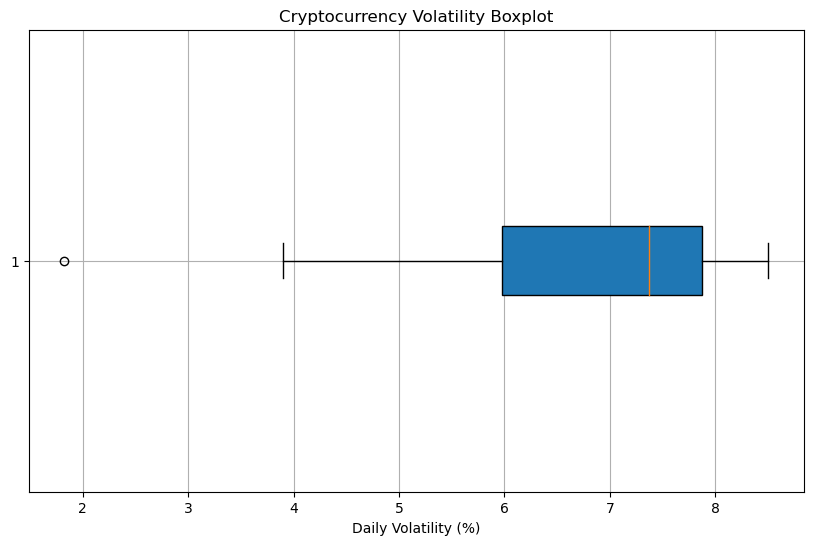

In [9]:
# 1c.
import matplotlib.pyplot as plt

volatility_data = list(daily_volatility.values())

plt.figure(figsize=(10, 6))
plt.boxplot(volatility_data, vert=False, patch_artist=True)
plt.xlabel('Daily Volatility (%)')
plt.title('Cryptocurrency Volatility Boxplot')
plt.grid(True)
plt.show()

In [10]:
# 2
import numpy as np

In [11]:
fname = "2019-06-24-prices.csv"

In [12]:
df0 = pd.read_csv(fname)
np_arr = np.genfromtxt(fname, skip_header=True, delimiter=",")

In [13]:
df0

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2019-06-24 00:01:06+02,e33ec0aa-a169-4040-a2af-e0098f7ff286,1.189,1.419,1.399,3,3,3
1,2019-06-24 00:01:06+02,368949c0-6cb1-4cf8-9d32-91bf503bb8cb,1.138,1.348,1.328,0,1,1
2,2019-06-24 00:01:06+02,d25c5cb7-d86b-4984-a626-d84f89248842,1.199,1.459,1.439,1,0,0
3,2019-06-24 00:02:07+02,2d658127-11b5-478c-b131-61b8a9785ca1,1.229,1.469,0.000,1,1,0
4,2019-06-24 00:03:06+02,24e5e31e-b5fd-4c1a-96aa-84de7027ee94,1.279,1.519,1.499,1,1,1
...,...,...,...,...,...,...,...,...
245696,2019-06-24 23:55:06+02,24b93ce4-c8a6-4deb-836d-c061cb5b8654,1.349,1.539,1.519,1,1,1
245697,2019-06-24 23:55:06+02,59ca7896-2c19-4354-97a2-a0f1de18be4f,1.249,1.469,1.449,1,1,1
245698,2019-06-24 23:59:05+02,00061277-0011-4444-8888-acdc00000011,1.229,1.469,1.449,1,1,1
245699,2019-06-24 23:59:05+02,00061379-0013-4444-8888-acdc00000013,1.229,1.469,1.449,1,1,1


In [14]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245701 entries, 0 to 245700
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          245701 non-null  object 
 1   station_uuid  245701 non-null  object 
 2   diesel        245701 non-null  float64
 3   e5            245701 non-null  float64
 4   e10           245701 non-null  float64
 5   dieselchange  245701 non-null  int64  
 6   e5change      245701 non-null  int64  
 7   e10change     245701 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 15.0+ MB


In [15]:
df0.describe()

,diesel,e5,e10,dieselchange,e5change,e10change
count,245701.000000,245701.000000,245701.000000,245701.000000,245701.000000,245701.000000
mean,1.259426,1.474431,1.413414,0.821539,0.800249,0.785349
std,0.059309,0.164549,0.281405,0.386013,0.402482,0.412953
min,0.000000,0.000000,-0.001000,0.000000,0.000000,0.000000
25%,1.219000,1.449000,1.429000,1.000000,1.000000,1.000000
50%,1.259000,1.489000,1.459000,1.000000,1.000000,1.000000
75%,1.289000,1.529000,1.499000,1.000000,1.000000,1.000000
max,1.999000,1.999000,2.000000,3.000000,3.000000,3.000000


In [16]:
df1 = df0.dropna() # Remove NaNs
df1.query("diesel <= 0.0", inplace=True) # Get rid of missing data
df1.query("e5 <= 0.0", inplace=True)
df1.query("e10 <= 0.0", inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 9106 to 236775
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          33 non-null     object 
 1   station_uuid  33 non-null     object 
 2   diesel        33 non-null     float64
 3   e5            33 non-null     float64
 4   e10           33 non-null     float64
 5   dieselchange  33 non-null     int64  
 6   e5change      33 non-null     int64  
 7   e10change     33 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.3+ KB


In [17]:
# 3b
from PIL import Image

In [18]:
with zipfile.ZipFile('m51_hubble_rgb.zip', 'r') as zip_ref:
    zip_ref.extractall('m51_hubble_rgb')

In [19]:
m51_r = Image.open('m51_hubble_rgb/m51_r.gif').convert('L')
m51_g = Image.open('m51_hubble_rgb/m51_g.gif').convert('L')
m51_b = Image.open('m51_hubble_rgb/m51_b.gif').convert('L')

In [20]:
imgArr_r = np.array(m51_r)
imgArr_g = np.array(m51_g)
imgArr_b = np.array(m51_b)

print("Red Image Dimensions:", imgArr_r.shape)
print("Green Image Dimensions:", imgArr_g.shape)
print("Blue Image Dimensions:", imgArr_b.shape)

Red Image Dimensions: (537, 763)
Green Image Dimensions: (537, 763)
Blue Image Dimensions: (537, 763)


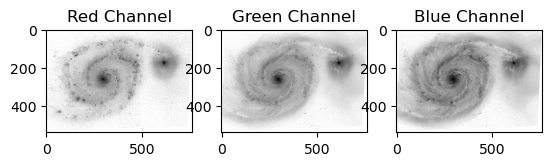

In [21]:
# 3c.
plt.subplot(131)
plt.imshow(imgArr_r, cmap='gray')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(imgArr_g, cmap='gray')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(imgArr_b, cmap='gray')
plt.title('Blue Channel')

plt.show()

In [22]:
# 3d.
imgArrInv_r = 255 - np.clip(imgArr_r, 0, 255)
imgArrInv_g = 255 - np.clip(imgArr_g, 0, 255)
imgArrInv_b = 255 - np.clip(imgArr_b, 0, 255)

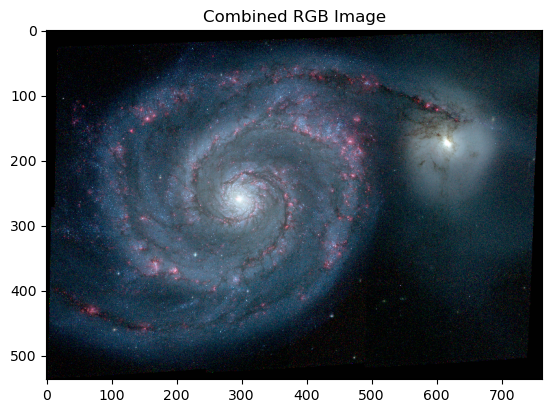

In [24]:
h, w = imgArr_r.shape 

imgRGB = np.zeros((h, w, 3), dtype=np.uint8)

imgRGB[:, :, 0] = imgArrInv_r
imgRGB[:, :, 1] = imgArrInv_g
imgRGB[:, :, 2] = imgArrInv_b

# 3e.
plt.imshow(imgRGB)
plt.title('Combined RGB Image')
plt.show()